# T3.1 Funciones discriminantes

# Índice

1. Funciones discriminantes
2. Funciones discriminantes lineales
3. Fronteras de decisión
4. Regiones de decisión
5. Clasificadores equivalentes

# 1. Funciones discriminantes

**Notación:**
* **Objetos (entradas):** $\;\boldsymbol{x}\in\mathcal{X},\,$ típicamente vectores de $D$ características reales, $\,\mathcal{X}=\mathbb{R}^D,\,D\geq 1$
* **Etiquetas de clase (salidas):** $\;y\in\mathcal{Y}\,$ o $\,c\in\mathcal{C},\,$ típicamente $\,\mathcal{Y}=\mathcal{C}=\{1,\dotsc,C\},\,C\geq 2$

**Representación clásica de clasificadores:** $\;$ con una **función discriminante** por clase, $\,g_c(\boldsymbol{x}),\,$ para medir la (pseudo-)probabilidad de que el objeto $\boldsymbol{x}$ pertenezca a la clase $c$. 

Bajo este escenario, asignaremos a $\boldsymbol{x}$ la clase de mayor (pseudo-)probabilidad de pertenencia:
$$c(\boldsymbol{x}) = \operatorname*{argmax}\limits_c\; g_c(\boldsymbol{x})$$

**Ejemplo:** $\;$ clasificador en 3 clases para $\,\boldsymbol{x}=(x_1,x_2)^t\in [0,1]^2$
$$\begin{array}{cccccc}x_1&x_2&
g_1(\boldsymbol{x})&g_2(\boldsymbol{x})&g_3(\boldsymbol{x})&c(\boldsymbol{x})\\\hline
0 & 0 & 1.0 & 0.0 & 0.0 & 1\\
0 & 1 & \tfrac{1}{3} & \tfrac{1}{3} & \tfrac{1}{3} & 1\\
1 & 0 & 0.25 & 0.5 & 0.25 & 2\\
1 & 1 & 0.01 & 0.01 & 0.98 & 3\\\hline
\end{array}$$

**Regla de decisión de Bayes:** $\;$ con $\;g_c(\boldsymbol{x}) = P(c\mid\boldsymbol{x})\;$ o $\;g_c(\boldsymbol{x}) = P(c)\,p(\boldsymbol{x}\mid c)$

# 2. Funciones discriminantes lineales

**Función discriminante lineal:** $\;$ función lineal con las características del objeto $\boldsymbol{x} = (x_1, x_2, \dotsc, x_D)$:
$$g_c(\boldsymbol{x})=\sum_d w_{cd}\,x_d + w_{c0} = \boldsymbol{w}_c^t\,\boldsymbol{x} + w_{c0}$$
Donde:
* $\boldsymbol{w}_c=(w_{c1},w_{c2},\dotsc,w_{cD})^t$ es el **vector de pesos** de la clase $c$,
* $w_{c0}$ es el **peso umbral** de la clase $c$.

$\;$

**Notación homogénea o compacta:** vector de pesos compacto incluyendo pesos de las características y peso umbral de la clase. 
$$g_c(\boldsymbol{x})=\boldsymbol{w}_c^t\,\boldsymbol{x}$$
Donde:
* $\;\boldsymbol{x}=(1,x_1,\dotsc,x_D)^t\,$ 
* $\,\boldsymbol{w}_c=(w_{c0},w_{c1},\dotsc,w_{cD})^t$

$\;$

**Ejemplo:** 

$$\;C=2,\, D=1,\, x\in\mathbb{R}$$
$$\boldsymbol{w}_1=(-4, 4)\; \rightarrow \; g_1(x)=4x-4\, $$
$$\boldsymbol{w}_2 =(-36, 12)\; \rightarrow \; g_2(x)=12x-36$$

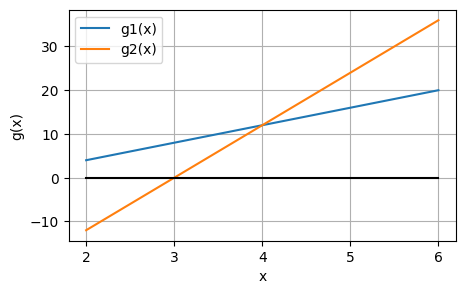

In [1]:
import numpy as np
import matplotlib.pyplot as plt
g1 = lambda x: 4*x-4;
g2 = lambda x: 12*x-36;
x = np.linspace(2, 6, 2);
plt.figure(figsize=(5, 3));
plt.xticks([2,3,4,5,6]);
plt.grid();
plt.xlabel("x"); plt.ylabel("g(x)");
plt.plot(x, g1(x), label="g1(x)", color="tab:blue"); 
plt.plot(x, g2(x), label="g2(x)", color="tab:orange");
plt.plot([2,6],[0,0], color="black");
plt.legend();

# 3. Fronteras de decisión

**Frontera de decisión entre clases:** $\;$ lugar geométrico donde las discriminantes de dos (o más) clases empatan:
$$g_c(\boldsymbol{x}) = g_{c'}(\boldsymbol{x}) \qquad \text{con} ~~c\neq c'$$

**Ejemplo (cont.):** $\displaystyle\; g_1(x) = g_2(x) \rightarrow 4x-4 = 12x-36 \rightarrow x = \frac{32}{8}=4$

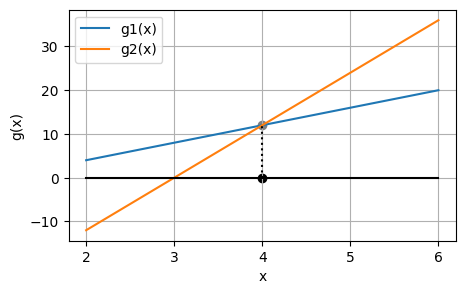

In [2]:
import numpy as np
import matplotlib.pyplot as plt
g1 = lambda x: 4*x-4
g2 = lambda x: 12*x-36
x = np.linspace(2, 6, 2);
plt.figure(figsize=(5, 3));
plt.xticks([2,3,4,5,6]);
plt.grid();
plt.xlabel("x"); plt.ylabel("g(x)");
plt.plot(x, g1(x), label="g1(x)", color="tab:blue"); 
plt.plot(x, g2(x), label="g2(x)", color="tab:orange");
plt.legend();
plt.scatter(4, g1(4), color="grey"); # Dibujar punto de cruce entre g1(x) y g2(x)
plt.scatter(4, 0, color="black"); # Dibujar frontera de decisión: punto x=4
plt.plot([4,4],[0,g1(4)], linestyle="dotted", color="black")
plt.plot([2,6],[0,0], color="black");

**Fronteras lineales:** $\;$ las discriminantes lineales originan fronteras lineales de dimensión $D$:
* Un punto, si $\;\mathcal{X}=\mathbb{R}$
* Una línea (rectas), si $\;\mathcal{X}=\mathbb{R}^2$
* Una superficie (planos), si $\;\mathcal{X}=\mathbb{R}^3$

**Fronteras en general:** $\;$ **hipersuperfícies** definidas por las ecuaciones
$$g_c(\boldsymbol{x})-g_{c'}(\boldsymbol{x})=0\qquad \text{con} ~~c\neq c'$$

# 4. Regiones de decisión

**Región de decisión de una clase:** $\;$ lugar geométrico donde la discriminante de la clase gana al resto:
$$R_c=\bigl\{\boldsymbol{x}\in\mathcal{X}:~~ g_c(\boldsymbol{x})>\max_{c'\neq c} \; g_{c'}(\boldsymbol{x})\bigr\}$$

**Ejemplo (cont.):** $\displaystyle\; R_1=\{x:g_1(x)>g_2(x)\}=(-\infty,4)\quad R_2=\{x:g_2(x)>g_1(x)\}=(4,\infty)$

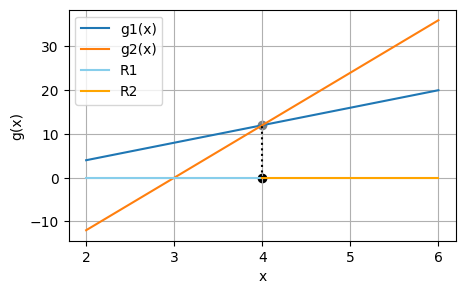

In [3]:
import numpy as np
import matplotlib.pyplot as plt
g1 = lambda x: 4*x-4
g2 = lambda x: 12*x-36
x = np.linspace(2, 6, 2);
plt.figure(figsize=(5, 3));
plt.xticks([2,3,4,5,6]);
plt.grid();
plt.xlabel("x"); plt.ylabel("g(x)");
plt.plot(x, g1(x), label="g1(x)", color="tab:blue"); 
plt.plot(x, g2(x), label="g2(x)", color="tab:orange");
plt.scatter(4, 0, color="black"); 
plt.scatter(4, g1(4), color="grey"); 
plt.plot([4,4],[0,g1(4)], linestyle="dotted", color="black")
plt.plot((2, 4), (0, 0), label="R1", color="skyblue"); # Dibujar región de decisión clase 1: puntos x<4
plt.plot((4, 6), (0, 0), label="R2", color="orange"); # Dibujar región de decisión clase 2: puntos x>=4
plt.legend();

# 5. Clasificadores equivalentes

**Propósito:** $\;$ simplificar un clasificador dado, $\,c(\boldsymbol{x})=\operatorname{argmax}_c g_c(\boldsymbol{x})$

**Clasificador equivalente:** $\;c'(\boldsymbol{x})=\operatorname{argmax}_c g_c'(\boldsymbol{x})\,$ es equivalente a $\,c(\boldsymbol{x})\,$ si $\,c(\boldsymbol{x})=c'(\boldsymbol{x})\,$ para todo $\,\boldsymbol{x}$.

**Construcción:** si $\,f:\mathbb{R}\to\mathbb{R}\,$ es estrictamente creciente, el siguiente clasificador es equivalente a $\,c(\boldsymbol{x})$
$$c'(\boldsymbol{x})=\operatorname{argmax}_c g_c'(\boldsymbol{x})%
\quad\text{con}\quad%
g_c'(\boldsymbol{x})=f(g_c(\boldsymbol{x}))+\operatorname{const}(\boldsymbol{x})$$
donde $\,\operatorname{const}(\boldsymbol{x})\,$ es cualquier función que puede variar (o no) con $\boldsymbol{x},\,$ pero no con $c$.

**Funciones estrictamente crecientes usuales:** $\;$ para construir clasificadores equivalentes simplificados:
$$f(z)=az+b\;\;\text{con}\;a>0%
\qquad f(z)=\log z\;\;\text{con}\;z>0%
\qquad f(z)=e^z$$

**Ejemplo (cont.):** $\;g'_1(x)=x-1,\;g'_2(x)=3x-9\;$ con $\;f(z)=\frac{1}{4}z$

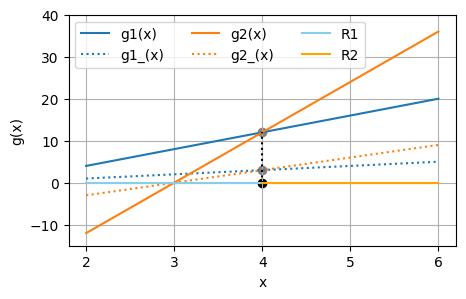

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# clasificador original:
g1 = lambda x: 4*x-4
g2 = lambda x: 12*x-36
# clasificador equivalente con f(z) = z * 1/4:
g1_ = lambda x: x-1; # g1_(x) = g1(x)*1/4
g2_ = lambda x: 3*x-9; # g2_(x) = g2(x)*1/4

x = np.linspace(2, 6, 2);
plt.figure(figsize=(5, 3));
plt.xticks([2,3,4,5,6]); 
plt.grid();
plt.xlabel("x"); plt.ylabel("g(x)");
plt.plot(x, g1(x), label="g1(x)", color="tab:blue"); 
plt.plot(x, g1_(x), label="g1_(x)", color="tab:blue", linestyle="dotted");
plt.plot(x, g2(x), label="g2(x)", color="tab:orange");
plt.plot(x, g2_(x), label="g2_(x)", color="tab:orange", linestyle="dotted");
plt.scatter(4, 0, color="black");
plt.scatter(4, g1(4), color="grey"); 
plt.scatter(4, g1_(4), color="grey"); 
plt.plot([4,4],[0,g1(4)], linestyle="dotted", color="black")
plt.plot((2, 4), (0, 0), label="R1", color="skyblue");
plt.plot((4, 6), (0, 0), label="R2", color="orange");
plt.legend(ncols=3)
plt.ylim(-15,40);